# # 출처 : https://yunwoong.tistory.com/50

In [5]:
import cv2
import os

# 설치 버전
print(cv2.__version__)

result_dir = 'result'

# Make Directory
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

4.6.0


In [15]:
path = 'C:/Users/admin/opencv/OCR/res/A00000016800903ko.jpg'

In [6]:
cv2_image = cv2.imread('res/A00000016800903ko.jpg', cv2.IMREAD_COLOR)
print(type(cv2_image))

<class 'numpy.ndarray'>


In [7]:
cv2.imshow('image1', cv2_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

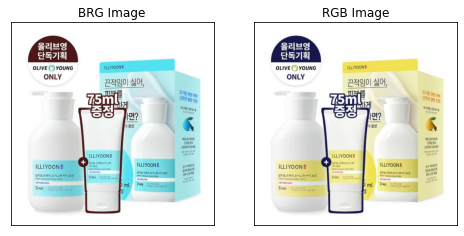

In [8]:
import matplotlib.pyplot as plt

rgb_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2_image)
plt.title('BRG Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.xticks([]), plt.yticks([])

plt.show()

In [9]:
def img_show(img, title='image', figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

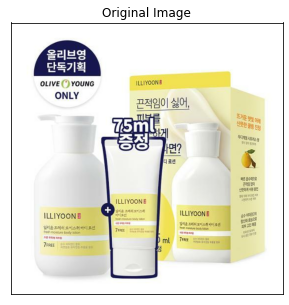

In [10]:
img_show(cv2_image, 'Original Image')

In [11]:
print('이미지 사이즈 : {}'.format(cv2_image.shape))
print('이미지 dtype : {}'.format(cv2_image.dtype))
print('이미지 Height : {}'.format(cv2_image.shape[0]))
print('이미지 Width : {}'.format(cv2_image.shape[1]))
print('이미지 전체 픽셀 개수 : {}'.format(cv2_image.size))

이미지 사이즈 : (550, 550, 3)
이미지 dtype : uint8
이미지 Height : 550
이미지 Width : 550
이미지 전체 픽셀 개수 : 907500


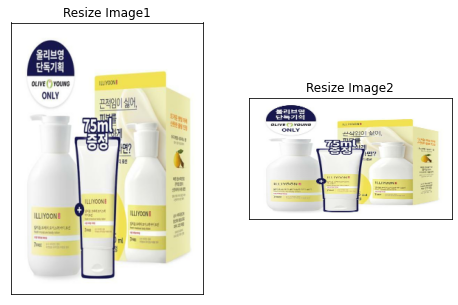

In [12]:
# 절대 크기로 변경하는 방법 (fx, fy)
resize_image = cv2.resize(cv2_image, dsize=(276, 391), interpolation=cv2.INTER_AREA)

# 상대 크기로 변경하는 방법 - 입력 이미지의 크기와 비례하도록 너비와 높이가 계산
resize_image2 = cv2.resize(cv2_image, dsize=(0, 0), fx=0.5, fy=0.3, interpolation=cv2.INTER_LINEAR)

img_show([resize_image, resize_image2], ['Resize Image1', 'Resize Image2'])

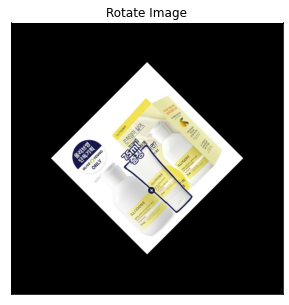

In [16]:
cv2_image = cv2.imread(path, cv2.IMREAD_COLOR)

height, width, channel = cv2_image.shape
matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 45, 0.5)
rotate_image = cv2.warpAffine(cv2_image, matrix, (width, height))

img_show(rotate_image, 'Rotate Image')

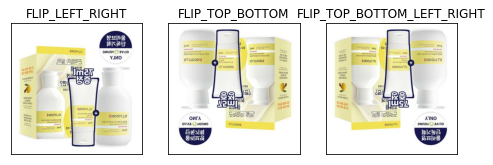

In [17]:
cv2_image = cv2.imread(path, cv2.IMREAD_COLOR)

img_show([cv2.flip(cv2_image, 1), cv2.flip(cv2_image, 0), cv2.flip(cv2_image, -1)], ['FLIP_LEFT_RIGHT', 'FLIP_TOP_BOTTOM', 'FLIP_TOP_BOTTOM_LEFT_RIGHT']) #좌우대칭, 상하반전, 상하좌우대칭

In [25]:
print('이미지 사이즈 : {}'.format(cv2_image.shape))

이미지 사이즈 : (550, 550, 3)


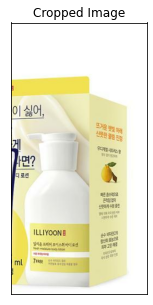

In [34]:
cv2_image = cv2.imread(path, cv2.IMREAD_COLOR)

# y1, y2, x1, x2
cropped_image = cv2_image[0:500, 300:580]
img_show(cropped_image, 'Cropped Image')

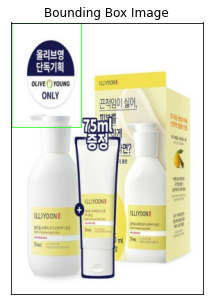

In [39]:
cv2_image = cv2.imread(path, cv2.IMREAD_COLOR)
resize_image = cv2.resize(cv2_image, dsize=(276, 391), interpolation=cv2.INTER_AREA)

bounding_box = (1, 1, 100, 150)

gt_x1, gt_y1, gt_w, gt_h = bounding_box
cv2.rectangle(resize_image, (int(gt_x1), int(gt_y1)), (int(gt_x1 + gt_w), int(gt_y1 + gt_h)), (0, 255, 0), 1)

img_show(resize_image, 'Bounding Box Image')

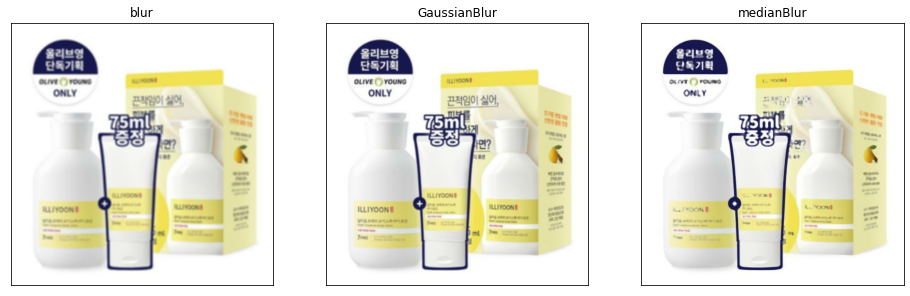

In [40]:
cv2_image = cv2.imread(path, cv2.IMREAD_COLOR)
blur_image = cv2.blur(cv2_image, (5,5))
gaussian_blur_image = cv2.GaussianBlur(cv2_image, (5,5), sigmaX=0)
median_blur_image = cv2.medianBlur(cv2_image, ksize=5)

img_show([blur_image, gaussian_blur_image, median_blur_image], ['blur', 'GaussianBlur', 'medianBlur'], figsize=(16, 10))

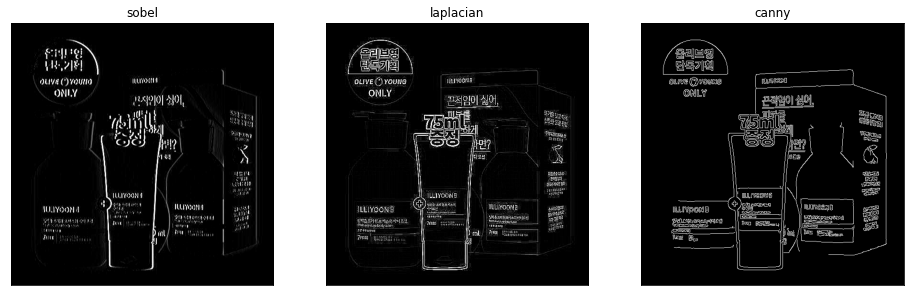

In [41]:
cv2_image = cv2.imread(path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2GRAY)

sobel = cv2.Sobel(gray_image, cv2.CV_8U, 1, 0, 3)
laplacian = cv2.Laplacian(gray_image, cv2.CV_8U, ksize=3)
canny = cv2.Canny(cv2_image, 100, 255)

img_show([sobel, laplacian, canny], ['sobel', 'laplacian', 'canny'], figsize=(16, 10))

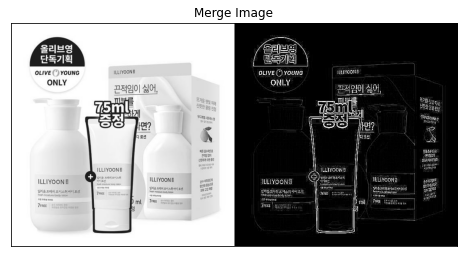

In [42]:
merge_image = cv2.hconcat([gray_image, laplacian])

img_show(merge_image, 'Merge Image')

In [43]:
cv2.imwrite(os.path.join(result_dir, "cv2_merge_image.jpg"), merge_image)

True

In [44]:
from PIL import Image
from PyQt5.QtGui import QImage

## Pillow Image -> CV2
def convert_from_image_to_cv2(img):
    return np.asarray(img)

## CV2 -> Pillow Image
def convert_from_cv2_to_image(img):
    return Image.fromarray(img)

def convert_from_QImage_to_cv2(img):
    '''  Converts a QImage into an opencv MAT format  '''

    img = img.convertToFormat(4)

    width = img.width()
    height = img.height()

    ptr = img.bits()
    ptr.setsize(img.byteCount())
    arr = np.array(ptr).reshape(height, width, 4)  #  Copies the data
    return arr

def convert_cv2_to_QImage(img):
    '''  Converts a opencv MAT into an QImage format  '''
    if len(img.shape) < 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    height, width, channel = img.shape
    bytesPerLine = 3 * width
    qImg = QImage(img.data, width, height, bytesPerLine, QImage.Format_RGB888)
    return qImg